
# <center>House Prices Advanced Regreession</center>



<br> </br>
<br> </br>
<br> </br>
<br> </br>

<br> </br><br> </br>
<br> </br><br> </br>
<br> </br><br> </br>
<br> </br><br> </br>
<br> </br><br> </br>
<br> </br><br> </br>
<br> </br><br> </br>
<br> </br><br> </br>

***
***
***

<br> </br><br> </br>
<br> </br><br> </br>
<br> </br>

##  <center> Table of Contents </center>
<br> </br><br> </br>

[ **1 ) Abstract**](#content1)

[ **2 ) Dataset**](#content2)

[ **3 ) Data Preprocessing and Feature Engineering**](#content3)

[ **4 ) Machine Learning Approach **](#content4)

[ **5 ) Deep Neural Network Approach **](#content5)

[ **6 ) Ensemble Approach **](#content6)

[ **7 ) Conclusion **](#content7)

[ **8 ) Acknowledgements **](#content8)

***

<br> </br><br> </br>
<br> </br><br> </br>
<br> </br><br> </br>
<br> </br><br> </br>
<br> </br><br> </br>
<br> </br><br> </br>
<br> </br><br> </br>
<br> </br><br> </br>
<br> </br>
<br></br>
<br></br>
<a id="content1"></a>
 ##  1. Abstract
 <br> </br>


<div style="text-align: justify; font-size:14px">
This project is a demonstration of kaggle compition[1]. In this competition a dataset containing 79 explanatory variables as features of houses were given. The training data contains the price of each house with their corresponding features. The task is to predict the prices for some other houses where the features are only known. The main part of this project is to properly prepare the data before feeding it to a regression algorithm or a deep neural network. Throughout the report the process of preprocessing, training regression algorithm and neural network is described step by step.
</div>


<a id="content2"></a>
 ##  2. Dataset
 <br> </br>


<div style="text-align: justify; font-size:14px">
The dataset was collected from the competition page of kaggle. The dataset is divided into two parts. Training samples with the given prices and test samples without the prices. The dataset contains both categorical and numeric features. It also contains missing values, outliers etc. The dataset can be found in [1].
</div>


<br></br>
<a id="content3"></a>
 ##  3.	Data Preprocessing and Feature Engineering
 <br> </br>


<div style="text-align: justify; font-size:14px">
Dataset preprocessing plays a vital role when it comes to feeding it to a classification or regression algorithm. The dataset, collected from kaggle had several problems with it. For example having so many missing values, outliers, distortion from the normal distribution etc. These were needed either to be dropped or handled manually. In this process several approaches were made to deal with these data. For an example dropping highly correlated variables and observing the performance of regression algorithms or keeping them and filling the missing values. There is no concreate definition what approach should be taken. But according to my observation and knowledge, the data were dealt with. <br> <br>

The first part of data analysis is to observe how many values are missing what kind of impact do they have on the decision making process. Some columns have more than 90% of missing values. These columns were treated according to their impact. The target variable was distorted from the normal distribution. The value of skewness was more than 1 (Positively skewed) which means that the are highly skewed. So the log transformation of the data were taken which reduced the skewness. Not only the target variable, but also other numeric variable that were skewed more than 0.50 were also log transformed. <br><br>

There some features in the dataset that are highly correlated with the target variable. These features seemed very significant to me. Mostly the correlation values greater than 0.50. These features were treated in two different ways. At first dropping
them, because filling these missing values may make the decision biased. Secondly filling up the missing values of these features according to their type and other data observation. It seems that keeping these data and feeling the missing one performs better. <br><br>

For numeric features, they were observed one by one to see the outliers and the distribution. Visualization showed that some data were skewed and also had outliers. But still taking direct decision towards the outliers seemed difficult before looking at their distribution with the target variable. So bivariate analysis of features with respect to target variable was made and outliers from some observation was removed. For some features they were kept as the number of outliers are higher and filling them with some other values may not seem a good idea. <br><br>

For the missing values, columns that have high percentage of missing values were dropped. If the feature is important then values were imputed in the missing position according to different strategies. Some of the missing values were filled in with zeroes such as GarageArea if there is no Garage. Some of the values were filled in with the mean, some of the categorical values were imputed using the mode.  When all the missing values were filled in, the categorical features were label encoded. 
<br><br>
The whole process with code sample is given below. 

</div>

### Importing the Modules and Loading the Dataset

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split, KFold

from sklearn.preprocessing import MinMaxScaler, StandardScaler


#encoding
from sklearn.preprocessing import LabelEncoder

#Statistical
from scipy import stats
from scipy.stats import norm, skew  

#### Dataset path

In [11]:
TRAIN_DATA_PATH = 'dataset\\train.csv'
TEST_DATA_PATH = 'dataset\\test.csv'

#### Data export path

In [26]:
EXPORTED_TRAIN_DATA_PATH = 'dataset\\preprocessed_train.v3.csv'
EXPORTED_TEST_DATA_PATH = 'dataset\\preprocessed_test.v3.csv'

In [4]:
## reading the training and testing data

train = pd.read_csv(TRAIN_DATA_PATH)
test = pd.read_csv(TEST_DATA_PATH)

In [5]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


### The Features and the 'Target' variable

In [6]:
df=train.copy()
#df.head(10)
df.shape

(1460, 81)

In [7]:
## Keeping the id column 
## as they need to exported with the data after preprocessing

train_id = train['Id']
test_id = test['Id']

In [8]:
## Dropping the 'Id' columns as the DataFrames are already indexed.

df.drop(['Id'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Note
   - For a detailed description of each feature please refer to the provided 'data_description.txt ' file.
   - path - /dataset/data_description.txt

### Check for Missing Values

In [9]:
df.isnull().sum().sort_values(ascending = False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofMatl           0
dtype: int64

#### Observation
    
   - Too many missing values for some columns. These columns require preprocessing.
   - Either these columns have to be dropped or preprocessed accordingly.

###  Separate Dataframes

#### CATEGORICAL FEATURES

In [10]:
cat_df = df.select_dtypes(include=[np.object])

cat_df.head(10)
cat_df.shape

(1460, 43)

In [11]:
cat_df.columns   
# list of the categorical columns.

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### NUMERICAL FEATURES

In [12]:
num_df=df.select_dtypes(include=[np.number])
num_df.shape

(1460, 37)

In [13]:
num_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#### FEATURES WITH MISSING VALUES

In [14]:
nan_df=df.loc[:, df.isnull().any()]

nan_df.columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

#### MERGING THE TRAIN & TEST SETS

In [15]:
all_data = pd.concat([train,test])

In [16]:
print(all_data.shape)
all_data = all_data.reset_index(drop=True)

(2919, 81)


In [17]:
all_data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


In [18]:
# Dropping the SalePrice column from the merged dataframe
all_data.drop(['SalePrice'],axis=1,inplace=True)


In [19]:
all_data.shape

(2919, 80)

###  Analyzing the Target i.e. 'SalePrice'

Text(0.5,1,'Sale Price')

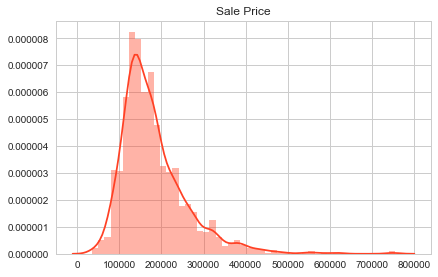

In [20]:
## analyzing the target variable ie 'Saleprice'
## This analysis gives a overall view of the data distribution


sns.distplot(a=df['SalePrice'],color='#ff4125',axlabel=False).set_title('Sale Price')

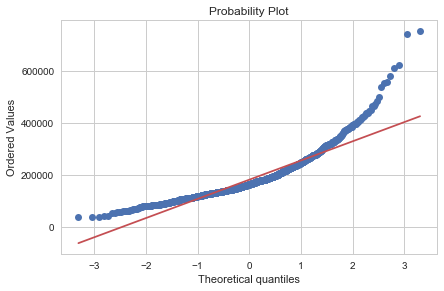

In [21]:
## Get also the qq-plot (the quantile-quantile plot)
## The quantile-quantile (q-q) plot is a graphical technique 
## for determining if two data sets come from populations with a common distribution.

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### Observation 
    
  - Skewness: The skewness is greater than 1(positively skewed), so the data are highly skewed.

  - Kurtosis: Distribution is longer, tails are fatter. Peak is higher and sharper (Kurtosis > 3), which means that data are heavy-tailed or profusion of outliers. 

<b>Skewness: </b>
It is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution. It differentiates extreme values in one versus the other tail. A symmetrical distribution will have a skewness of 0.

<b>Kurtosis: </b>
Kurtosis is all about the tails of the distribution — not the peakedness or flatness. It is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution.


Reference : <br> 
[1] https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa <br>
[2] https://www.itl.nist.gov/div898/handbook/eda/section3/eda33o.htm

####  TAKING 'Log Transform' OF THE TARGET

In [22]:
df['SalePrice']=np.log1p(df['SalePrice']) 

Text(0.5,1,'log(1+SalePrice)')

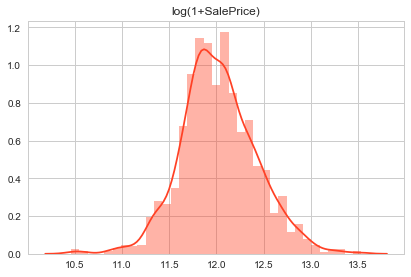

In [23]:
# now gain see the distribution.
sns.distplot(a=df['SalePrice'],color='#ff4125',axlabel=False).set_title('log(1+SalePrice)')

###  Most Related Features to the Target

In [24]:
## Understanding the correlation here.
## Before taking any decision the correlation needs to be understood
## which value effect the target the most needs to be known


cor_mat= df[:].corr()
cor_with_tar=cor_mat.sort_values(['SalePrice'],ascending=False)

In [25]:
print("The most relevant features (numeric) for the target are :")
cor_with_tar.SalePrice

The most relevant features (numeric) for the target are :


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

#### Observation

1. It can be seen the some of the features have really high corelation with the target. These features are really significant.

2. Of these, the features with corelation value > 0.5 are really significant. Some features like GrLivArea etc.. are even more important.

3. We will consider these features (i.e. GrLivArea,OverallQual) etc. in more detail in subsequent sections for preprocessing.

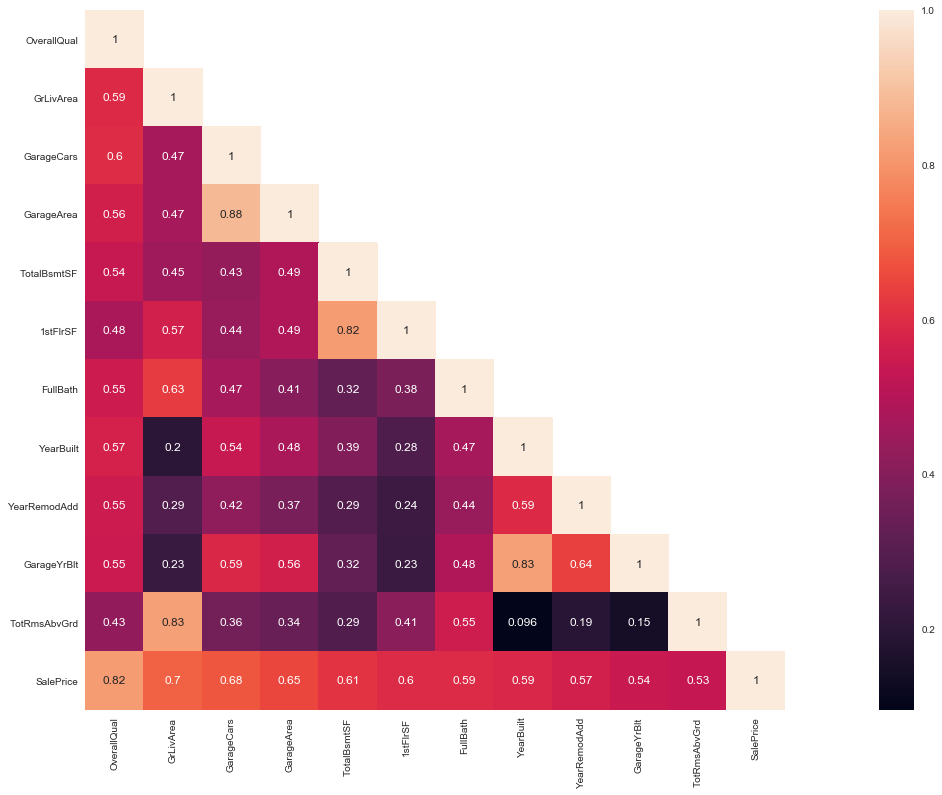

In [26]:
## using a corelation map to visualize features with high corelation.
## The columns were selected based on the correlation values
## corelation matrix.
cor_mat= df[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
             'YearBuilt','YearRemodAdd','GarageYrBlt','TotRmsAbvGrd','SalePrice']].corr()

mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

# some inference section.

###  Univariate Analysis

In this section I have performed the univariate analysis. Particularly on those features which have very high correlation with the the Target variable as these are quite important.

#### Note
For the numeric features I have used a 'distplot' and 'boxplot' to analyze the distribution.
Similarly for categorical features the most reasonable way to visualize the distribution is to use a 'countplot' which shows the counts for each category or class. 

#### NUMERIC FEATURES

In [27]:
def plot_num(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

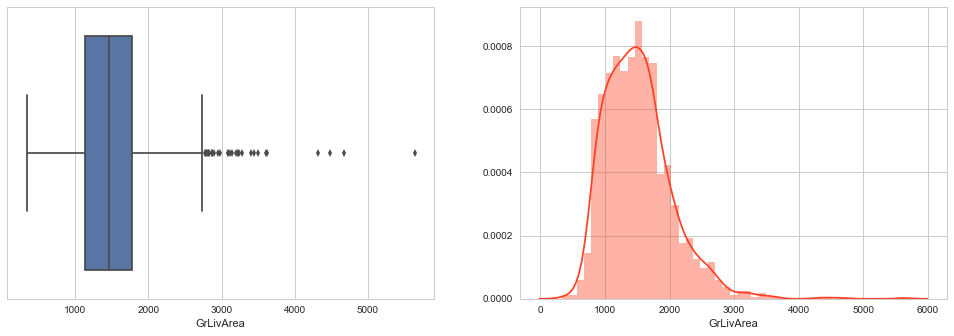

In [28]:
plot_num('GrLivArea')

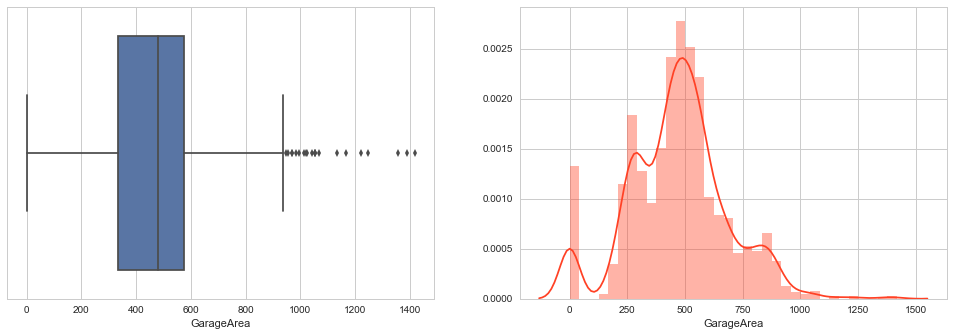

In [29]:
plot_num('GarageArea')

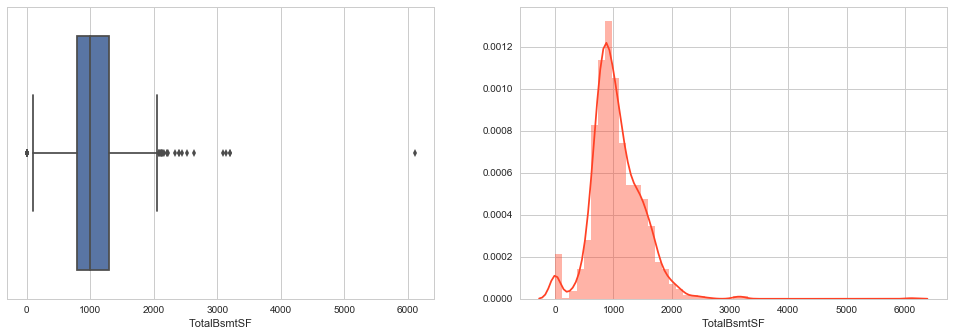

In [30]:
plot_num('TotalBsmtSF') 

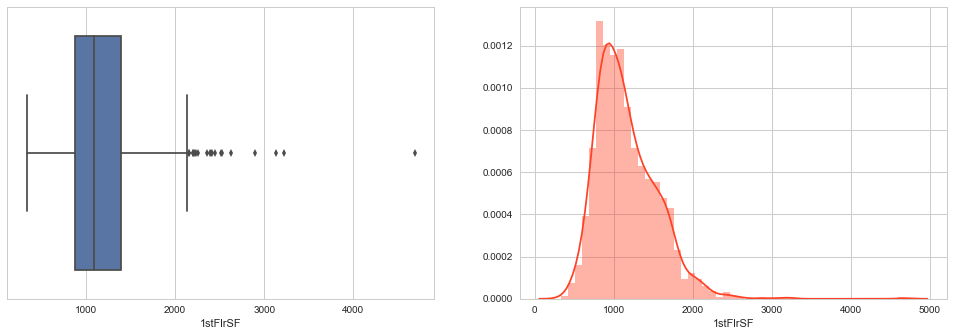

In [31]:
plot_num('1stFlrSF') 

#### Observation 
- The features are a bit right skewed. We can therefore take 'log transform' of the features or a BoXCox transformation. 

Reference: http://onlinestatbook.com/mobile/transformations/box-cox.html

#### CATEGORICAL FEATURES

In [32]:
def plot_cat(feature):
  plt.figure(figsize=(15,5))
  sns.countplot(data=df,x=feature)
  ax=sns.countplot(data=df,x=feature)
   

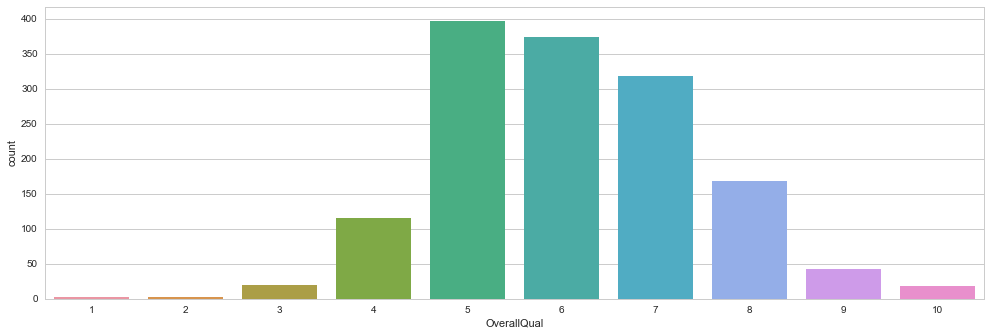

In [33]:
plot_cat('OverallQual')

#### Observation
 - Most of them are in 'avergae','above avergae' or 'good' categories.

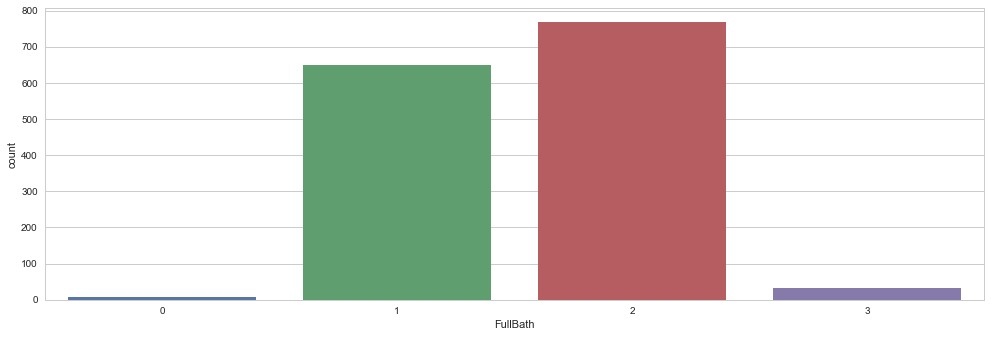

In [34]:
plot_cat('FullBath')

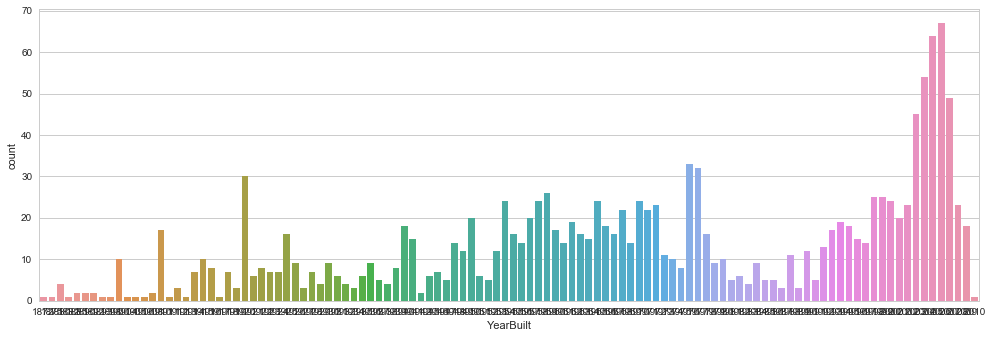

In [35]:
plot_cat('YearBuilt')

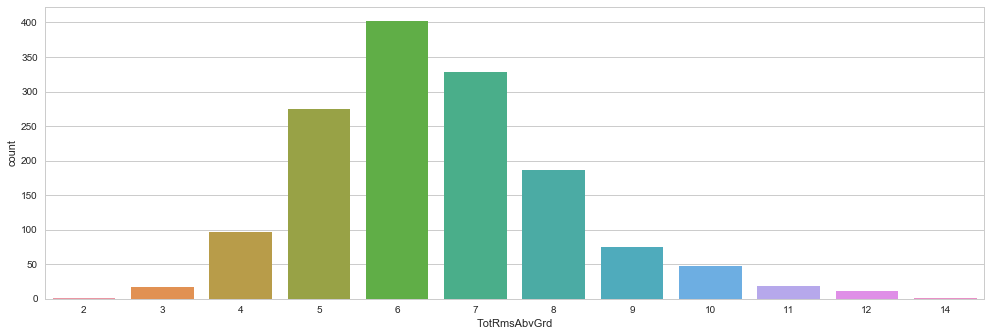

In [36]:
plot_cat('TotRmsAbvGrd') 
# most of the houses have 5-7 rooms above the grd floor.

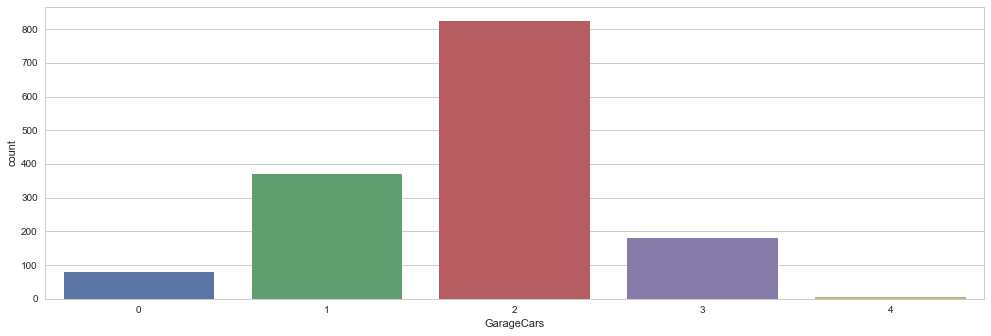

In [37]:
plot_cat('GarageCars')

####  Observation
 - Features that are numerical here (GarageCars), are actually categorical and seems if they have been label encoded.

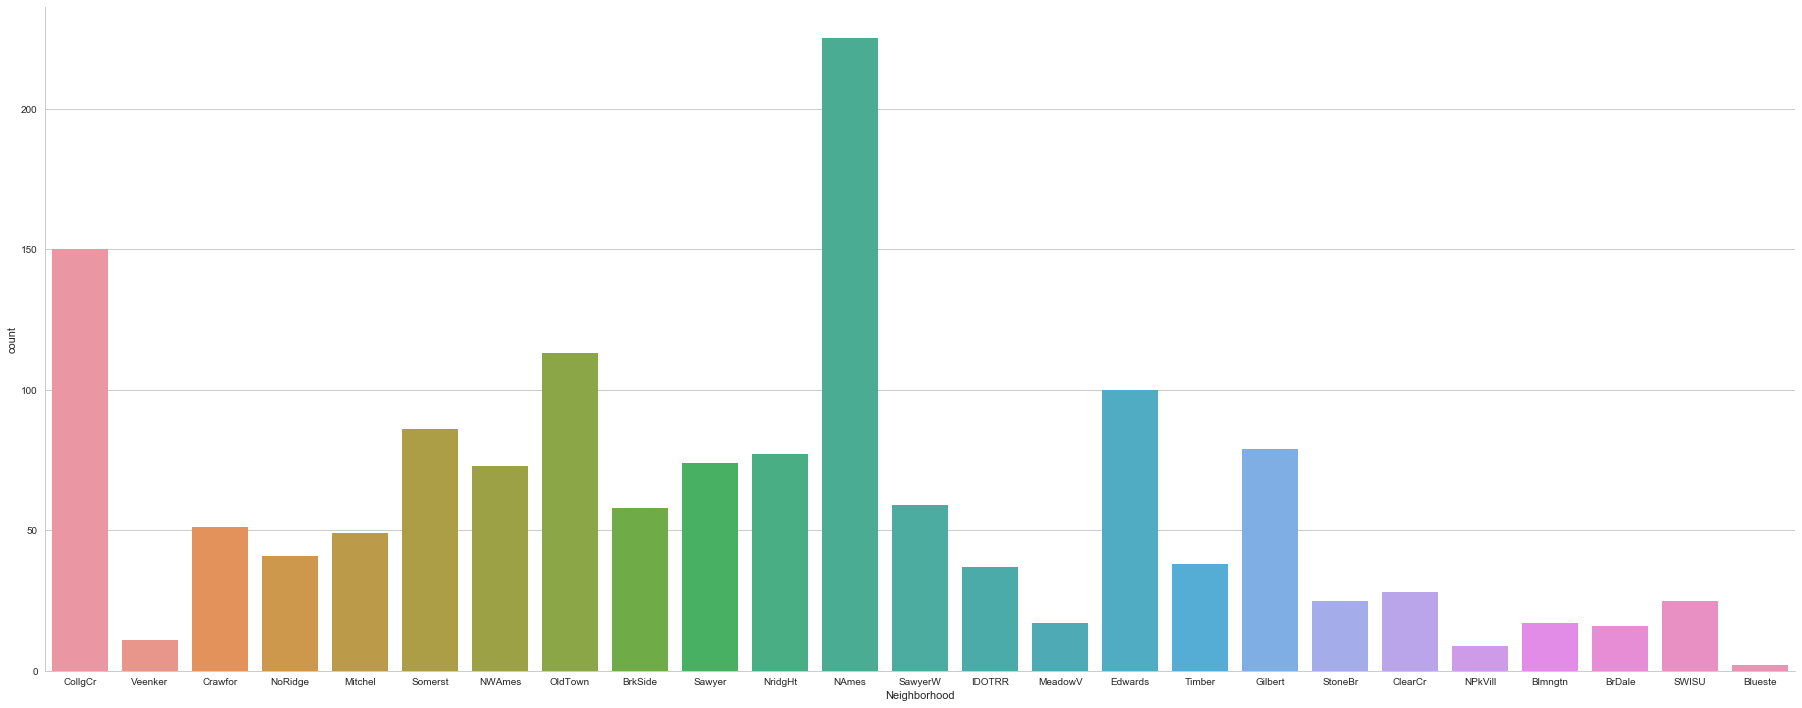

In [38]:
sns.factorplot(data=df,x='Neighborhood',kind='count',size=10,aspect=2.5)

### Bivariate Analysis

- In this section the Bivariate Analysis have been done. I have plotted various numeric as well as categorical features against the target ie 'SalePrice'.

#### NUMERIC FEATURES

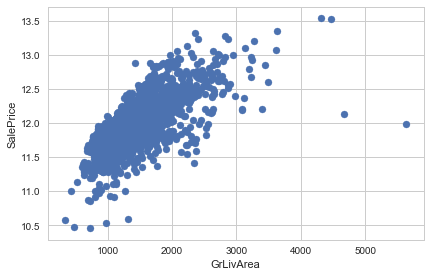

In [39]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

#### Observation 
- There are two outliers on the lower right hand side and can remove them.

In [40]:
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<13)].index) 
# removing some outliers on lower right side.

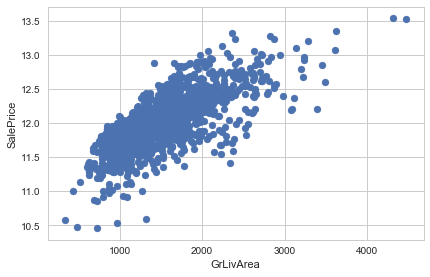

In [41]:
# again checking
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

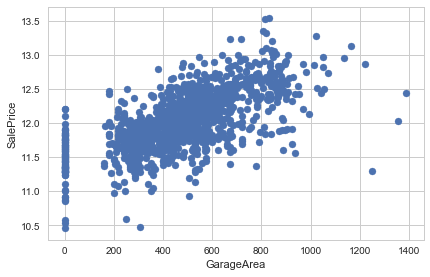

In [42]:
# garage area
fig, ax = plt.subplots()
ax.scatter(x =(df['GarageArea']), y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()

# can try to remove the points with gargae area > than 1200.

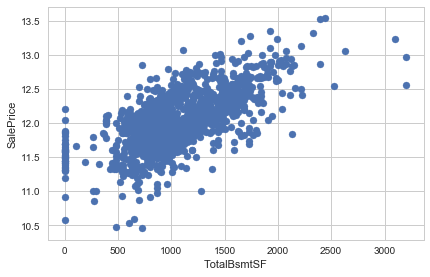

In [43]:
# basment area
fig, ax = plt.subplots()
ax.scatter(x =(df['TotalBsmtSF']), y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.show()   

# can try to remove the points with  basementarea > than 3000.

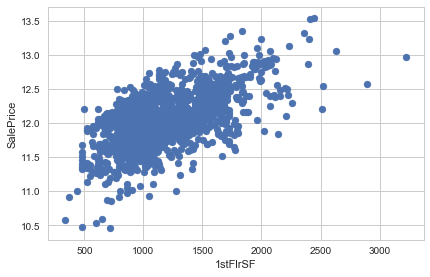

In [44]:
# 1st floor area
fig, ax = plt.subplots()
ax.scatter(x =(df['1stFlrSF']), y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('1stFlrSF')
plt.show()   

# can try to remove the points with  1st floor area > than 2600.

#### CATEGORICAL FEATURES

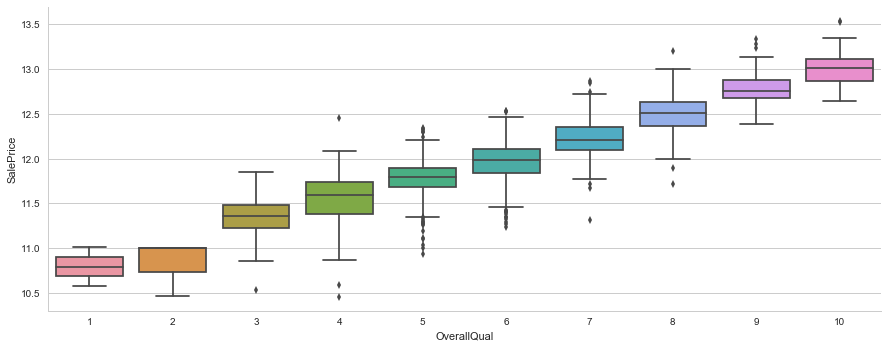

In [45]:
#overall qual
sns.factorplot(data=df,x='OverallQual',y='SalePrice',kind='box',size=5,aspect=2.5)

#### Observation
- As the overall quality increases the sale price also increases which is pretty obvious.

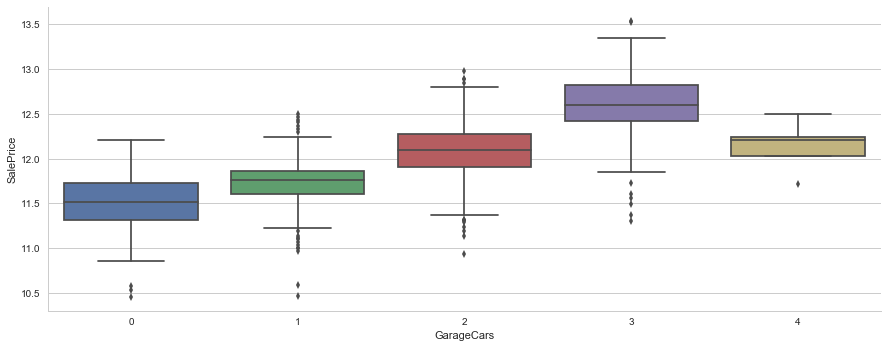

In [46]:
#garage cars
sns.factorplot(data=df,x='GarageCars',y='SalePrice',kind='box',size=5,aspect=2.5)

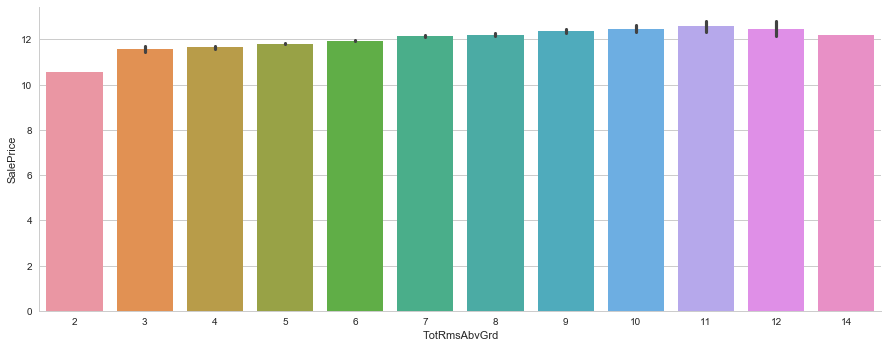

In [47]:
#no of rooms
sns.factorplot(data=df,x='TotRmsAbvGrd',y='SalePrice',kind='bar',size=5,aspect=2.5) 

#### Observation 
- increasing rooms imply increasing SalePrice as expected.

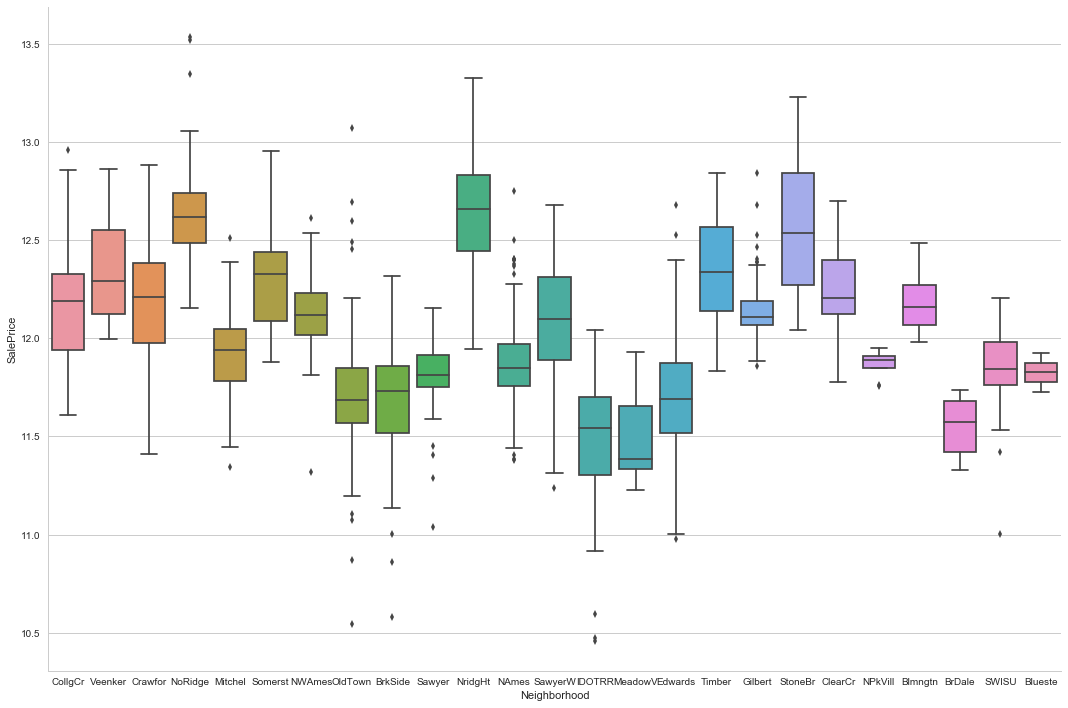

In [48]:
#neighborhood
sns.factorplot(data=df,x='Neighborhood',y='SalePrice',kind='box',size=10,aspect=1.5)

#### Observation
 - Price varies with neighborhood. More rich areas of the city will have more price.

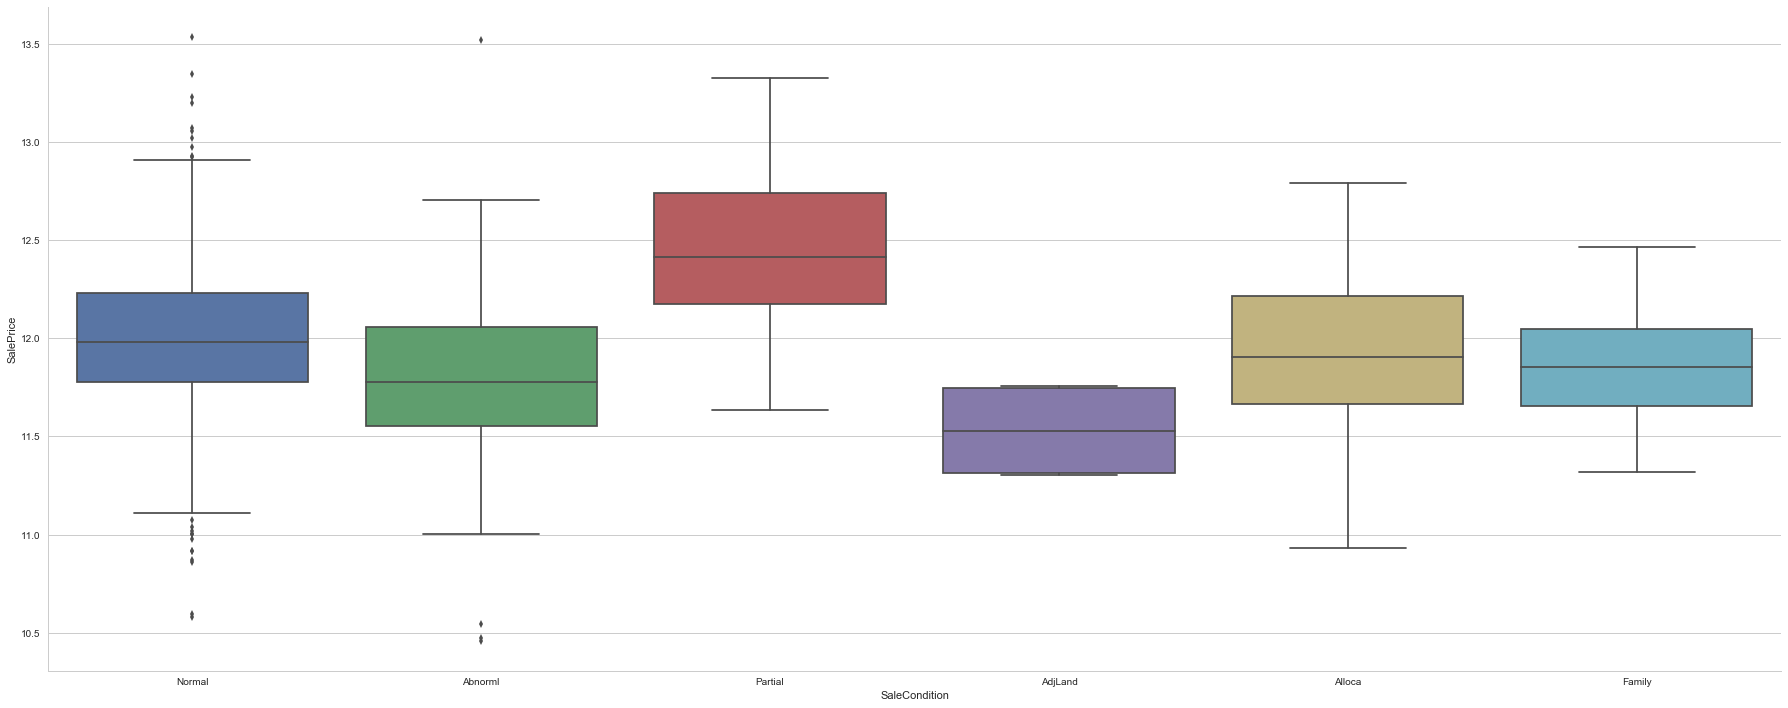

In [49]:
#sale conditioin
sns.factorplot(data=df,x='SaleCondition',y='SalePrice',kind='box',size=10,aspect=2.5)

### Missing Values Treatment 

#### 1. In this section I have handled the missing values in the columns.
   - Firstly I have dropped a couple of columns that have a really high % of missing values.
​
   - For other features I have analyzed if it that feaure is important or not and accordingly either have dropped it or imputed the values in it.
​
   - For imputation I have considered the meaning of the corressponding feature from the description. Like for a categorical feature if values are missing I have imputed "None" just to mark a separate category meaning absence of that thing. Similarly for a numeric feature I have imputed with 0 in case the missing value implies the 'absence' of that feature.
​
   - In all other cases I have imputed the categorical features with 'mode' i.e the most frequent class and with 'mean' for the numeric features.
   

In [50]:
nan_all_data = (all_data.isnull().sum())
nan_all_data= nan_all_data.drop(nan_all_data[nan_all_data== 0].index).sort_values(ascending=False)
nan_all_data
miss_df = pd.DataFrame({'Missing Ratio' :nan_all_data})
miss_df

,Missing Ratio
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
Id,1459
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageFinish,159
GarageQual,159


#### Delete the features with very high number of missing values.  
 - PoolQC
 - Alley
 - Fence
 - MiscFeature
 - Id

In [51]:
## delete features with very high number of missing values.  
## imputing these values won't improve the performance
## rather it will make the decision biased

all_data.drop(['PoolQC','Alley','Fence','Id','MiscFeature'],axis=1,inplace=True)

test.drop(['PoolQC','Alley','Fence','MiscFeature'],axis=1,inplace=True)
df.drop(['PoolQC','Alley','Fence','MiscFeature'],axis=1,inplace=True)

#### Note 
- FireplaceQu - It is useful but many of the values nearly half are missing and makes no sense to fill half of the values. so deleting this

In [52]:
all_data.drop(['FireplaceQu'],axis=1,inplace=True)
test.drop(['FireplaceQu'],axis=1,inplace=True)
df.drop(['FireplaceQu'],axis=1,inplace=True)

float64
count    1199.000000
mean       69.797331
std        23.203458
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
The corelation of the LotFrontage with the Target :  0.37289965522445007


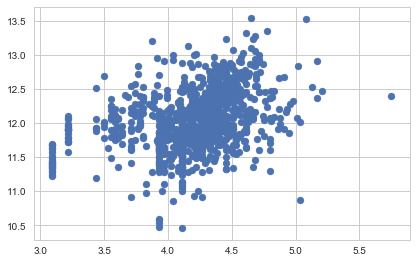

In [53]:
#Lot Frontage
print(df['LotFrontage'].dtype)
plt.scatter(x=np.log1p(df['LotFrontage']),y=df['SalePrice'])
cr=df.corr()
print(df['LotFrontage'].describe())
print("The corelation of the LotFrontage with the Target : " , cr.loc['LotFrontage','SalePrice'])


#### Observation
 - Above analysis shows that there are some relation of LotFrontage with teh sale price both by scatter plot and also by the correlation value. Therefore, instead of deleting I will fill the values with the mean.

In [54]:
all_data['LotFrontage'].fillna(np.mean(all_data['LotFrontage']),inplace=True)
all_data['LotFrontage'].isnull().sum()

0

#### Garage  related features.
 - These features eg like garage qual,cond,finish,type seems to be important and relevant for buying car. hence I will not drop these features insted i will fill them with the 'none' for categorical and 0 for numeric as NaN here implies that there is no garage.


In [55]:

all_data['GarageYrBlt'].fillna(0,inplace=True)
print(all_data['GarageYrBlt'].isnull().sum())

all_data['GarageArea'].fillna(0,inplace=True)
print(all_data['GarageArea'].isnull().sum())

all_data['GarageCars'].fillna(0,inplace=True)
print(all_data['GarageCars'].isnull().sum())

all_data['GarageQual'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageQual'].isnull().sum())

all_data['GarageFinish'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageFinish'].isnull().sum())

all_data['GarageCond'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageCond'].isnull().sum())

all_data['GarageType'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageType'].isnull().sum())



0
0
0
0
0
0
0


In [56]:
# basement related features.
#missing values are likely zero for having no basement

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col].fillna(0,inplace=True)
    
# for categorical features we will create a separate class 'none' as before.

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col].fillna('None',inplace=True)
    
print(all_data['TotalBsmtSF'].isnull().sum())



0


In [57]:
# MasVnrArea 0 and MasVnrType 'None'.
all_data['MasVnrArea'].fillna(0,inplace=True)
print(all_data['MasVnrArea'].isnull().sum())

all_data['MasVnrType'].fillna('None',inplace=True)
print(all_data['MasVnrType'].isnull().sum())

0
0


In [58]:
#MSZoning.
# Here nan does not mean no so I will with the most common one ie the mode.
all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0],inplace=True)
print(all_data['MSZoning'].isnull().sum())

0


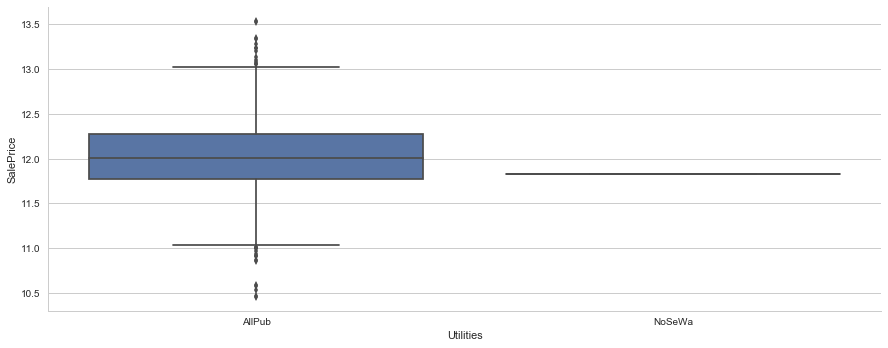

In [59]:
# utilities
sns.factorplot(data=df,kind='box',x='Utilities',y='SalePrice',size=5,aspect=2.5)

#### Observation
 - That training set has only 2 of the possible 4 categories (ALLPub and NoSeWa) while test set has other categories. Hence it is of no use to us.

In [60]:
all_data.drop(['Utilities'],axis=1,inplace=True)

In [61]:
#functional
# fill with mode
all_data['Functional'].fillna(all_data['Functional'].mode()[0],inplace=True)
print(all_data['Functional'].isnull().sum())

0


In [62]:
# other remaining columns are all categorical, like kitchen qual etc.. and so filled with mode.
for col in ['SaleType','KitchenQual','Exterior2nd','Exterior1st','Electrical']:
  all_data[col].fillna(all_data[col].mode()[0],inplace=True)
  print(all_data[col].isnull().sum())

0
0
0
0
0


#### Lastly checking if any null values are still remaining.

In [63]:
nan_all_data = (all_data.isnull().sum())
nan_all_data= nan_all_data.drop(nan_all_data[nan_all_data== 0].index).sort_values(ascending=False)
nan_all_data
miss_df = pd.DataFrame({'Missing Ratio' :nan_all_data})
miss_df



,Missing Ratio


#### Finally no null value remain now !

In [64]:
all_data.shape

(2919, 73)

### Handling Skewness

Now I am handling skewness of the features. For this I will take the log transform of the features with skewness > 0.5.

BoxCox transformation can also be tried here.

Reference: http://onlinestatbook.com/mobile/transformations/box-cox.html

#### log transform skewed numeric features:

In [65]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.50]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

### Prepare the Data

#### LabelEncode the Categorical Features

In [66]:
for col in all_data.columns:
    if(all_data[col].dtype == 'object'):
        le=LabelEncoder()
        all_data[col]=le.fit_transform(all_data[col])

#### Splitting into Training and Testing Sets

In [67]:
train= all_data[: 1460]
test = all_data[1460: ]

In [68]:
train['SalePrice']=df['SalePrice']
train['SalePrice'].fillna(np.mean(train['SalePrice']),inplace=True)
train.shape
print(train['SalePrice'].isnull().sum())

0


In [69]:
#train['Id'] = train.index
#test['Id'] = test.index

train.reset_index(inplace = True)
test.reset_index(inplace = True)



train = pd.concat([train_id, train], axis = 1)
test = pd.concat([test_id, test], axis = 1)

#### Exporting

In [70]:
train.to_csv(EXPORTED_TRAIN_DATA_PATH, index= False)
test.to_csv(EXPORTED_TEST_DATA_PATH, index= False)


#### Conclusion of the approach

<div style="text-align:justify;">
In the preprocessing, I have tried diffrent approaches to clean the data and do some feature engineering. While having a look in the internet I've seen several approaches like, dropping columns with NaN values, box cox transformation of numerical values, min max scaling, dropping values with higher and lower correlation, handling missing values with different approaches.
<br>
After studying all these available resources and from my own knowledge I've ended up on the above preprocessing. For other approaches it may work well or may not. But with further investigation and experiments on the dataset the result might increase.
</div>

<br> </br>
<br></br>
<br></br>
<a id="content4"></a>
 ##  4. Machine Learning Approach
 <br> </br>
<br></br>
<br></br>

In this approach Extreme Gradient Boosting (XGBoost) regression algorithm and Lasso were used. Using Grid Search best parameters were tried to find out and with those parameters the regressors were trained and made prediction which was later submitted to kaggle.

 #### Importing the Modules and Loading the Dataset

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algorithms from scikit-learn.

#regression
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge
from sklearn.svm import SVR

from xgboost import XGBRegressor as XGBR

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV

#evaluation metrics for regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error  


#### Data Path

In [ ]:
TRAIN_DATA_PATH = 'dataset\\preprocessed_train.v3.csv'
TEST_DATA_PATH = 'dataset\\preprocessed_test.v3.csv'

### Regression Models

#### Training models 

#### Working with the labeled dataset only to check the performance

In [ ]:
## reading the training dataset here
## only the training dataset from kaggle will be used here for training & evaluation purpose

dataset = pd.read_csv(TRAIN_DATA_PATH)

In [ ]:
label = dataset['SalePrice']

In [ ]:
dataset.drop(['SalePrice'], axis = 1, inplace= True)

#### Splitting the labeled dataset
 - Train 80 %
 - Test 20 %

In [ ]:
train_data, test_data , train_label, test_label = train_test_split(dataset, label, test_size = 0.2)

#### Feature Selection

 - Principal component analysis (36 Components)
 
 Reference: 
 
 1. https://www.kaggle.com/miguelangelnieto/pca-and-regression <br>
 2. https://www.kaggle.com/mani443/houses-prices-using-pca

In [ ]:
## using standard scaler to normalize the training data


#Scaler = StandardScaler()
Scaler = MinMaxScaler()

## using principal component analysis to reduce the dimensionality of the features
## principal componenets taken 36

pca = PCA(n_components=36)

train_data = Scaler.fit_transform(train_data)
test_data = Scaler.transform(test_data)


train_data = pca.fit_transform(train_data)
test_data = pca.transform(test_data)

In [ ]:
train_data.shape

#### RMSE Function

In [ ]:

def rmse(predictions, labels):
    return np.sqrt(mean_squared_error(predictions,labels))
    

#### Multiple Models with default parameters

In [ ]:
## Creating a dictionary of models. 
## These models are referenced with their default parameters
## and checking how do they perform with their default parameters 
## this gives a better understanding of parameter tuning

models = {
    
    'XGBRegressor': XGBR(),
    'LinearRegressor': LinearRegression(),
    'NaiveBayes': BayesianRidge(),
    'SVM': SVR(),
    'Lasso': Lasso(),
    
}

In [ ]:
## using the dictionary of models
## to predict data
## and saving the calculation in a dataframe
## for visualization 

def predict_models(models, train_data, train_label, test_data, test_label):

    row = 0    
    results = pd.DataFrame()

    for name, model in models.items():
        model.fit(train_data, train_label)
        score = model.score(train_data, train_label)
        predictions = model.predict(test_data) 
        results.loc[row, 'Model'] = name
        results.loc[row, 'Score'] = score
        results.loc[row, 'Log-RMSE'] = rmse(predictions, test_label)
        results.loc[row, 'RMSE'] = rmse(np.expm1(predictions), np.expm1(test_label))

        row += 1
    return results


In [ ]:
predict_models(models, train_data, train_label, test_data, test_label)

### GridSearch best parameters for XGBoost and Lasso

#### XGBoostRegressor

In [ ]:
xgb1 = XGBR()

parameters = {
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [2, 3, 5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [i/10.0 for i in range(4,9)],
              'colsample_bytree': [i/10.0 for i in range(4,9)],
              'n_estimators': [500], 
              'gamma':[i/10.0 for i in range(3,6)],}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(train_data, train_label)

prediction = xgb_grid.predict(test_data)


## Rmse score with best parameters
print('RMSE Score: ')
print(rmse(prediction, test_label))

## best score achieved in GridSearch
print('Best Score: ')
print(xgb_grid.best_score_)

## best parameters found by gridsearch
print('Best Parameters: ')
print(xgb_grid.best_params_)

#### Lasso

In [ ]:
params_dict = {
        'alpha':[0.001, 0.005, 0.01,0.05,0.1,0.5,1]
      }

reg_lasso_CV = GridSearchCV(estimator=Lasso(),
                            param_grid=params_dict, 
                            scoring='neg_mean_squared_error',
                            cv=10)

reg_lasso_CV.fit(train_data,train_label)

prediction = reg_lasso_CV.predict(test_data)

print('RMSE Score: ')
print(rmse(prediction, test_label))

print('Best Score: ')
print(reg_lasso_CV.best_score_)

print('Best Parameters: ')
print(reg_lasso_CV.best_params_)

### KFold Cross Validation with XGB

In [ ]:
kfold = KFold(n_splits = 10, shuffle=True)

In [ ]:
kfold_auc = list()

for train_index, test_index in kfold.split(dataset):
    X_train, y_train = dataset.iloc[train_index], label.iloc[train_index]
    X_test, y_test = dataset.iloc[test_index], label.iloc[test_index]
    
    StdScaler = MinMaxScaler()
    X_train = StdScaler.fit_transform(X_train)
    X_test = StdScaler.transform(X_test)
    
    
    model =  XGBR(
                colsample_bytree=0.4603, 
                gamma=0.0468, 
                learning_rate=0.05, 
                max_depth=3, 
                min_child_weight=1.7817, 
                n_estimators=2200,
                reg_alpha=0.4640, 
                reg_lambda=0.8571,
                subsample=0.5213, 
                silent=1,
                random_state =7, 
                nthread = -1
            )
    
    #model = LinearRegression()

    model.fit(X_train, y_train)

    predict = model.predict(X_test)
    
    kfold_auc.append(mean_squared_error(predict, y_test))

print(np.mean(kfold_auc))
    

### Putting up XGBoostRegressor for Kaggle Submission 

#### Importing the datasets

 - Original train is the original training data that has been preprocessed. This data will be used for training the model. Original test will be applied for testing and then the predictions will be submitted to kaggle



In [ ]:
original_train = pd.read_csv(TRAIN_DATA_PATH)
original_test = pd.read_csv(TEST_DATA_PATH)

In [ ]:
original_label = original_train['SalePrice']
test_ID = original_test['Id']

In [ ]:
StdScaler = StandardScaler()
#StdScaler = MinMaxScaler()

pca = PCA(n_components=36)

In [ ]:
original_train = StdScaler.fit_transform(original_train)
original_test = StdScaler.transform(original_test)


original_train = pca.fit_transform(original_train)
original_test = pca.transform(original_test)

#### Checking the default models with the original training data. Here the testing and training sets are kept same to understand how the model is working. thought it's not an effiecient strategy but gives an overall idea.

In [ ]:
predict_models(models, original_train, original_label, original_train, original_label)

#### Firing up XGBoostRegressor with the parameters found in GridSearch
#### Some parameters are yet changed while tuning.

In [ ]:
model =  XGBR(
                colsample_bytree=0.4603, 
                gamma=0.0468, 
                learning_rate=0.05, 
                max_depth=3, 
                min_child_weight=1.7817, 
                n_estimators=2200,
                reg_alpha=0.4640, 
                reg_lambda=0.8571,
                subsample=0.5213, 
                silent=1,
                random_state =7, 
                nthread = -1
            ),


model.fit(original_train, original_label)

predict = model.predict(original_test)


### Kaggle Submission and Result

In [ ]:
submission = pd.DataFrame()

submission['Id'] = test_ID

submission['SalePrice'] = np.expm1(predict)

submission.to_csv('submission_xgb.csv' , index=False)

<br>

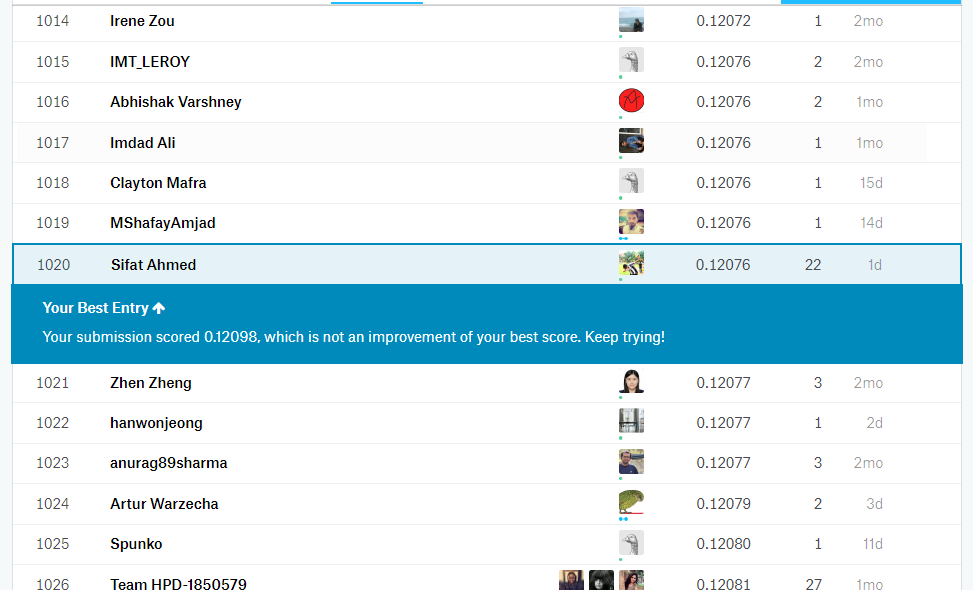

<br>

<center>Fig: Kaggle Submission</center>



#### Conclusion of the approach

<div style="text-align:justify;">
XGBoost regressor achieved the best score here. There are many other strategies and algorithms that can be applied here such as model stacking, ensemble approach. These are kept for future implementation.
<br>
</div>

***

<br></br>
<br></br>
<a id="content5"></a>
 ##  5. Deep Neural Network Approach
<br> </br>
<br></br>
<br></br>

#### Importing the necessary modules

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, KFold

In [ ]:
# This is the default path for the dataset

TRAIN_DATA_PATH = 'dataset\\preprocessed_train.v3.csv'
TEST_DATA_PATH = 'dataset\\preprocessed_test.v3.csv'

## Reading the dataset here.
## There are two parts in the dataset.
## Training data is used to see how the model performs.
## Training data is splitted into 80% - 20%.
## For performance evaluation.

dataset = pd.read_csv(TRAIN_DATA_PATH)
test_dataset = pd.read_csv(TEST_DATA_PATH)


dataset = pd.get_dummies(dataset)
test_dataset = pd.get_dummies(test_dataset)

## Keeping the test_id for kaggle submission and then dropping it as it's not necessary in the dataset.

test_id = test_dataset['Id']
test_dataset.drop('Id' , axis = 1, inplace=True)

## Saleprice is the target value for the dataset. SalePrice is already log transformed in the preprocessing step.
Y = dataset['SalePrice']

## As the target values are saved, now we can drop it from the data
## Also the Id column as it's not necessary

dataset.drop(['Id', 'SalePrice'], axis = 1, inplace= True)

## Splitting the training dataset into 80-20 split
## Original test isn't used here. The training data provided by kaggle has been used
## The preprocessed training data will help us to evaluate the performance before feeding the original test data into it


#X_train, X_test , Y_train, Y_test = train_test_split(dataset, Y, test_size = 0.2)

## Normalizing the features before putting it into the neural network
## StandardScaler will normalize the features (each column of X) 
## so that each column/feature/variable would have mean = 0 and standard deviation = 1.

#Scaler = MinMaxScaler()
#Scaler = StandardScaler()

#X_train = Scaler.fit_transform(X_train) 
#X_test = Scaler.transform(X_test)

###  Deep Neural Network Model 

In [ ]:
class Sequential_Model:
    
    
    def __init__(self):
        self.__current_layer = -1
        self.__weights = list()
        self.__biases = list()
        self.__dropout = list()
        self.__l2_regularizer = list()
        self.__activation = list()
        self.__training_cost = list()
        self.__validation_cost = list()
        self.__regularize = 0
        
        
        self.__session = tf.Session()
    
    
    def __del__(self):
        self.__session.close()
    
    
    
    def Add_Dense_layer(self, input_shape, output_shape, activation_function = 'leaky_relu', dropout_rate = 0.0):
        """
        params: 
        input shape - dense layer's input shape
        output shape - dense layer's output shape
        activation_function - activation function for the layer (Default: leaky_relu)
        dropout_rate - dropout rate of the layer (default 0.0 means no dropout)
        
        """
        self.__current_layer = self.__current_layer + 1
        
        self.__weights.append(tf.Variable(tf.random.truncated_normal([input_shape, output_shape], 0.1)))
        self.__biases.append(tf.Variable(tf.ones([output_shape])))
        
        self.__activation.append((self.__current_layer, activation_function))
        self.__dropout.append((self.__current_layer , dropout_rate))

        
    
    def Add_L2_Regularize(self, beta = 0.013):
        """
        params:
        beta - Beta value for L2 regularizer (Default 0.01)
        """
        self.__l2_regularizer.append((self.__current_layer, beta))
    
    
    def __rmse(self, predictions , label):
        return tf.losses.mean_squared_error(predictions, label)
    
    
    def __plot(self):
        plt.plot(self.__training_cost)
        plt.plot(self.__validation_cost)
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper right')
        plt.show()
    
    def __train(self, train_data, train_label, validation_data, validation_label, epochs, batch_size, plot):
        
        self.__x_train = tf.placeholder(tf.float32)
        self.__y_train = tf.placeholder(tf.float32)
        
        
        ## Calculating for the first layer
        self.__output = tf.add(tf.matmul(self.__x_train, self.__weights[0]) , self.__biases[0])
       
        ## Checking the activation function
        ## If no activation function found then 
        ## Exception thrown
        if self.__activation[0][1] == 'relu':
            self.__output = tf.nn.relu(self.__output)
        elif self.__activation[0][1] == 'leaky_relu':
            self.__output = tf.nn.leaky_relu(self.__output)
        elif self.__activation[0][1] == 'tanh':
            self.__output = tf.nn.tanh(self.__output)
        elif self.__activation[0][1] == 'sigmoid':
            self.__output = tf.nn.sigmoid(self.__output)
        
        else:
            raise ValueError("Activation Function doesn't exist.")
        
        ## Checking for dropout.
        ## If any dropout rate is given rather than 0.0 then it's applied
        ## On the layer
        if self.__dropout[0][1] != 0.0 :
            self.__output = tf.layers.dropout(self.__output, self.__dropout[0][1])

        
        
        ## Using a loop to calculate the remaining layers
        ## With this loop calculations are done dynamically
        ## rather than doing it manually
        
        ## Because of this approach the model trains slower(!)
        for i in range(1, self.__current_layer + 1):
            
            ## Multiplying weights with the previous output and adding the bias
            self.__output = tf.add(tf.matmul(self.__output, self.__weights[i]) , self.__biases[i])
            
            
            ## Passing through an activation function as given
            ## while adding the layer.
            if self.__activation[i][1] == 'relu':
                self.__output = tf.nn.relu(self.__output)
            elif self.__activation[0][1] == 'leaky_relu':
                self.__output = tf.nn.leaky_relu(self.__output)
            elif self.__activation[0][1] == 'tanh':
                self.__output = tf.nn.tanh(self.__output)
            elif self.__activation[0][1] == 'sigmoid':
                self.__output = tf.nn.sigmoid(self.__output)
            else:
                raise ValueError("Activation Function doesn't exist.")
            
            
            ## Applying the dropout if any given
            if self.__dropout[i][1] != 0.0 :
                self.__output = tf.layers.dropout(self.__output, self.__dropout[i][1])
        
        #for r in self.__l2_regularizer:
            ## L2 regularizing the weights and multiplying them with corresponding beta value
            ## then taking the sum of all the layers
            #self.__regularize += (tf.nn.l2_loss(self.__weights[r[0]]) * r[1]) 
        
        
        
        ## Calculating the Root mean squared error
        ## for demonstration purpose I have kep only one function
        ## other type of functions can be added as per necessary
        if self.__loss == 'rmse':
            loss = self.__rmse(self.__output , self.__y_train)
        else:
            raise ValueError("Loss function doesn't exist.") 
        
        
        
        if self.__regularize is not None:
            loss = tf.reduce_mean(loss + self.__regularize)
        
        
        
        ## Only two optimizers are demonstrated here
        ## Other optimizers can also be added.
        if self.__optimizer == 'adam':
            optimizer = tf.train.AdamOptimizer(learning_rate=self.__learning_rate).minimize(loss)
        elif self.__optimizer == 'rmsprop':
            optimizer = tf.train.RMSPropOptimizer(learning_rate=self.__learning_rate).minimize(loss)
        else: 
            raise ValueError("Optimizer doesn't exist.")
        
        
        ## Initializing all the variables
        init = tf.global_variables_initializer()
        self.__session.run(init)
        
        
        ## Training the model for given number of epochs
        for epoch in range(epochs+1):
            avg_train_cost = 0.0
            
            ## dividing into batches as per user declared size
            total_num_batch = train_data.shape[0]//batch_size
            
            
            ## collecting the data as per batches and feeding it to the model
            for index, offset in enumerate(range(0, train_data.shape[0], batch_size)):
                
                ## xs denotes the training data batch and ys denotes the training label batch
                xs, ys = train_data[offset: offset + batch_size], train_label[offset: offset + batch_size]
                ## running the optimizer and loss with the batch collected above.
                _, cost = self.__session.run([optimizer, loss], feed_dict = {self.__x_train: xs, self.__y_train: np.reshape( ys, (-1, 1))})
            
            ## taking the average for the epoch for all batches under the epoch 
            avg_train_cost += (cost / total_num_batch)

            ## Checking the validation loss here
            validation_cost = self.__session.run( self.__rmse(self.__output, self.__y_train),
                                    feed_dict={self.__x_train: validation_data, self.__y_train: np.reshape(validation_label, (-1, 1))})

            ## Saving these costs for plotting
            self.__training_cost.append(avg_train_cost)
            self.__validation_cost.append(validation_cost)
            
            #if epoch % 20 == 0:
            print('Epoch -', (epoch), '||| Training loss: ', '{:.5f}'.format(avg_train_cost), 
                      '||| Validation loss: ', '{:.5f}'.format(validation_cost))

        if plot:
            ## plotting the loss values
            self.__plot()
    
    def compile(self, loss='rmse', optimizer='adam', learning_rate = 0.01):
        """
        params:
        loss: loss function default 'Rmse'
        optimizer: default optimizer adam
        learning_rate: default 0.01
        """
        ## taking the necessary inputs for the model to run
        ## these are the final inputs before the model starts training
        self.__loss = loss
        self.__optimizer = optimizer
        self.__learning_rate = learning_rate
            
      
    
    def fit(self, train_data, train_label, epochs = 100, batch_size = 24, plot = True, validation_data = (None, None), validation_size = 0.1):
        """
        params:
        train_data
        train_label
        epochs - default 100
        batch_size - default 24
        plot - default True : plots the loss of validation and training loss
        validation data: default None. If no data given then a portion is created.
        validation_size: default 0.1 (10%)
        
        """
        ## Checking if there is any validation data given
        ## If no validation data given then validation data is created by default size
        if validation_data[0] == None or validation_data[1] == None:
            train_data, validation_data, train_label, validation_label = train_test_split(train_data, train_label, 
                                                                                          test_size = validation_size)
            
            self.__train(train_data, train_label, validation_data, validation_label, epochs, batch_size, plot)
        else:
            
            ## if validation data is given then it's directly feed to train method
            self.__train(train_data, train_label, validation_data[0], validation_data[1], epochs, batch_size, plot)
        
    
    def evaluate(self, test_data, test_label):
        """
        param:
        test_data, test_label
        returns:
        loss for test_data and test_label
        """
        ## For test data checking the models loss with known labels.
        ## rmse is used here as by default of my project.
        testing_cost = self.__session.run( self.__rmse(self.__output , self.__y_train),
                            feed_dict={self.__x_train: test_data, self.__y_train: np.reshape(test_label, (-1, 1))})
        print('Testing loss: ', '{:.5f}'.format(testing_cost))
    
    
    def predict(self, test_data):
        """
        param: 
        test_data - value to be predicted
        
        returns:
        predicted values
        """
        ## Taking the test data which the model will predict values of.
        prediction = self.__session.run(self.__output, feed_dict={self.__x_train: test_data})
        return prediction

### Creating a Model Object

In [ ]:
def get_model():
    model = Sequential_Model()

    model.Add_Dense_layer(input_shape= X_train.shape[1] , output_shape=37, 
                          activation_function='relu', dropout_rate=0.2)
    ## dropout rate is 0.3. It means that 30% of the neurons 
    ## will be dropped randomly to prevent overfitting. 

    model.Add_L2_Regularize()

    model.Add_Dense_layer(input_shape=37, output_shape=18, 
                          activation_function='relu', dropout_rate=0.2)
    model.Add_L2_Regularize()

    model.Add_Dense_layer(input_shape=18, output_shape=6, 
                          activation_function='relu', dropout_rate=0.2)
    model.Add_L2_Regularize()

    model.Add_Dense_layer(input_shape=6, output_shape=1, 
                          activation_function='relu', dropout_rate=0.2)

    model.compile(loss='rmse',optimizer='rmsprop',learning_rate=0.001)

    return model

### Applying Cross Validation (KFold)

In [ ]:
kfold = KFold(n_splits = 10, shuffle=True)

In [ ]:
for train_index, test_index in kfold.split(dataset):
    X_train, y_train = dataset.iloc[train_index], Y.iloc[train_index]
    X_test, y_test = dataset.iloc[test_index], Y.iloc[test_index]
    
    StdScaler = MinMaxScaler()
    X_train = StdScaler.fit_transform(X_train)
    X_test = StdScaler.transform(X_test)
    
    
    model = get_model()
    model.fit(train_data=X_train, train_label=y_train, epochs=25, batch_size=12)
    model.evaluate(X_test, y_test)

 ### Test Prediction and Kaggle Submission

In [ ]:
## Reading the dataset here.
## There are two parts in the dataset.
## Training data is used to see how the model performs.
## Training data is splitted into 80% - 20%.
## For performance evaluation.

dataset = pd.read_csv(TRAIN_DATA_PATH)
test_dataset = pd.read_csv(TEST_DATA_PATH)

In [ ]:
## Keeping the test_id for kaggle submission and then dropping it as it's not necessary in the dataset.

test_id = test_dataset['Id']
test_dataset.drop('Id' , axis = 1, inplace=True)

In [ ]:
## Saleprice is the target value for the dataset. SalePrice is already log transformed in the preprocessing step.
Y = dataset['SalePrice']

In [ ]:
## As the target values are saved, now we can drop it from the data
## Also the Id column as it's not necessary

dataset.drop(['Id', 'SalePrice'], axis = 1, inplace= True)

In [ ]:
## Normalizing the features before putting it into the neural network
## StandardScaler will normalize the features (each column of X) 
## so that each column/feature/variable would have mean = 0 and standard deviation = 1.

Scaler = StandardScaler()

X_train = Scaler.fit_transform(X_train) 
X_test = Scaler.transform(test_dataset)

In [ ]:
predicted = model.predict(X_test)

***

#### Summary of the approach


Throughout this approach the main target was to utilize the object oriented approach to make the model creation dynamic. Further changes can be made to make the model creation more robust. My main target was to make the model in a Keras style model creating system. 

*  Observations
    * The approach works better with less layers (Mostly One as linear model).
    * For activation function ReLU worked well rather than other activation functions.
    * Increasing the Number of neurons for multiple layers dpesn't improve the model's performance.
    * Dropout has been used in every layer to stop overfitting. Without dropout the model sometimes gets stuck in the local minima which causes the same loss for every epoch.
    * Adding L2 Regularization improves the performance. 
    * With multiple layers, the model requires more than 1500 epochs without regularization. There is a tendency after a certain amount of epochs, it gets stuck in the local minima or converge slowly.
    * Optimal batch size found is 12.
    * As said above, One layered linear model has a tendency to work better sometimes but for the
    configuration of 4 layers with decreasing the neurons in half or around half with ReLU achieved the best score with L2 Regularization added to first three layers.
    * Running Grid Search was very much time consuming. So the best model was derived from intuition and best score achieved at kaggle submissions. Around 10 configurations were tried and the above described one performed best.
    
#### Score Achieved in kaggle:  <font color=red>0.11466</font>


#### Comments
    
* The whole thing was done in a Object Oriented Approach. This gave me an extra benefit of making several model objects and test them accordingly.
* As I have used loops in tensorflow for the first time, the model isn't opitimized well. For an example adding the regularization makes it very slow in the loop. I believe this can be done more efficiently and optimally.
    

## Optimal Model



<table style="width:90%;text-alignment:center;">
    <caption style="text-align: center; font-size:18px; padding:20px;" >Model Summary</caption>
  <tr>
    <th style="text-align: center; font-size:14px; padding:20px;">Layer</th>
    <th style="text-align: center; font-size:14px;">Type</th>
    <th style="text-align: center; font-size:14px;">Shape</th> 
  </tr>
  
  <tr>
    <td style="text-align: center; font-size:14px;">Layer_1</td>
    <td style="text-align: center; font-size:14px;">Input</td>
    <td style="text-align: center; font-size:14px;">( 74 , 37 )</td>
  </tr>
  <tr>
    <td style="text-align: center; font-size:14px;">Activation_1</td>
    <td style="text-align: center; font-size:14px;">Relu</td>
    <td style="text-align: center; font-size:14px;">Layer_1</td>
  </tr>
  <tr>
    <td style="text-align: center; font-size:14px;">Dropout_1</td>
    <td style="text-align: center; font-size:14px;">Rate - 0.2</td>
    <td style="text-align: center; font-size:14px;">Layer_1</td>
  </tr>
  <tr>
    <td style="text-align: center; font-size:14px;">L2_Regularization_1</td>
    <td style="text-align: center; font-size:14px;">Beta - 0.013</td>
    <td style="text-align: center; font-size:14px;">Layer_1</td>
  </tr>
  
  <tr>
    <td style="text-align: center; font-size:14px;">Layer_2</td>
    <td style="text-align: center; font-size:14px;">Dense</td>
    <td style="text-align: center; font-size:14px;">( 37 , 18 )</td>
  </tr>
  <tr>
    <td style="text-align: center; font-size:14px;">Activation_2</td>
    <td style="text-align: center; font-size:14px;">Relu</td>
    <td style="text-align: center; font-size:14px;">Layer_2</td>
  </tr>
  <tr>
    <td style="text-align: center; font-size:14px;">Dropout_2</td>
    <td style="text-align: center; font-size:14px;">Rate - 0.2</td>
    <td style="text-align: center; font-size:14px;">Layer_2</td>
  </tr>
  <tr>
    <td style="text-align: center; font-size:14px;">L2_Regularization_2</td>
    <td style="text-align: center; font-size:14px;">Beta - 0.013</td>
    <td style="text-align: center; font-size:14px;">Layer_2</td>
  </tr>
  
  
  <tr>
    <td style="text-align: center; font-size:14px;">Layer_3</td>
    <td style="text-align: center; font-size:14px;">Dense</td>
    <td style="text-align: center; font-size:14px;">( 18 , 6 )</td>
  </tr>
  <tr>
    <td style="text-align: center; font-size:14px;">Activation_3</td>
    <td style="text-align: center; font-size:14px;">Relu</td>
    <td style="text-align: center; font-size:14px;">Layer_3</td>
  </tr>
  <tr>
    <td style="text-align: center; font-size:14px;">Dropout_1</td>
    <td style="text-align: center; font-size:14px;">Rate - 0.2</td>
    <td style="text-align: center; font-size:14px;">Layer_1</td>
  </tr>
  <tr>
    <td style="text-align: center; font-size:14px;">L2_Regularization_3</td>
    <td style="text-align: center; font-size:14px;">Beta - 0.013</td>
    <td style="text-align: center; font-size:14px;">Layer_3</td>
  </tr>
  
  <tr>
    <td style="text-align: center; font-size:14px;">Layer_4</td>
    <td style="text-align: center; font-size:14px;">Output</td>
    <td style="text-align: center; font-size:14px;">( 6 , 1 )</td>
  </tr>
  <tr>
    <td style="text-align: center; font-size:14px;">Activation_4</td>
    <td style="text-align: center; font-size:14px;">Relu</td>
    <td style="text-align: center; font-size:14px;">Layer_4</td>
  </tr>
</table>


### Choosing the Best Hyperparameters

* #### Number of Layers:
<div style="text-align: justify; font-size:14px"> There's one additional rule of thumb that helps for supervised learning problems. The upper bound on the number of hidden neurons that won't result in over-fitting is: </div>

\begin{equation*}
N_h = \frac{N_s} {(\alpha * (N_i + N_o))}
\end{equation*}

* $N_h$ = Number of Hidden Layers. <br>
* $N_i$  = number of input neurons. <br>
* $N_o$ = number of output neurons. <br>
* $N_s$ = number of samples in training data set. <br>
* $α$ = an arbitrary scaling factor usually 2-10. <br>

<br>


* <div style="text-align: justify; font-size:14px"> The target here is to optimize the value of $α$. According to rule $α$ must be between 1 to 10. So for different values of $α$ the model was checked. The model performed better for $α$ = 5 resulting $N_h$= 4  </div>

* #### Number of Neurons:
<div style="text-align: justify; font-size:14px"> Numbers of Neuron per layer was chosen based on the trial and error method. Taking a large number of Neurons produce same output for all inputs causing an ambiguity. So, keeping that in mind the number of layers were chosen according to the input shape and reduced to $1/2$, $3/2$, $1/4$ three different ratios in hidden layers. Taking $1/2$ of input and gradually decreasing to 1 in output performed better.  </div>


* #### Dropout:
    <div style="text-align: justify; font-size:14px">This hyperparameter has been selected using a trial and error method. In preprocessing, a lot of noise can be seen when the samples were visualised. As there are a lot of noise, it's necessary to apply dropout. Dropout cancels out random neurons by multiplying them with zeros. Let us assume that there is a Hypothesis $Hi$, after applying dropout this $Hi$ hypothesis gets cancelled out and now the model needs to find a better or similar hypothesis $Hj$. Thus applying dropout forces the model to find better features. Throughout the trial and error method and observation of loss curves the best value for dropout was found <b> 0.2 </b> in all layers. The range tested here was  <b> 0.1 to 0.45 </b>.</div>

   * #### Before Adding Dropout

<center> 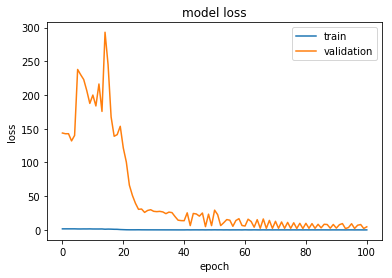 </center>

<br> <br>
    <center><b>Figure - Learning Curve without adding dropout</b></center>
    <br> <br>
    </div>


   * #### Optimized Dropout (0.2)

<center>  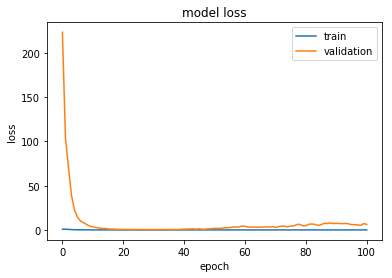 </center>

<br> <br>
    <center><b>Figure- Learning Curve after adding Optimal Dropout.</b></center>
    <br> <br>
    </div>





* #### L2 Regularization (Beta):

    <div style="text-align: justify; font-size:14px"> Considerring the following generalization curve, which shows the loss for both the training set and validation set against the number of training iterations. <br><br> </div>
    <div>
    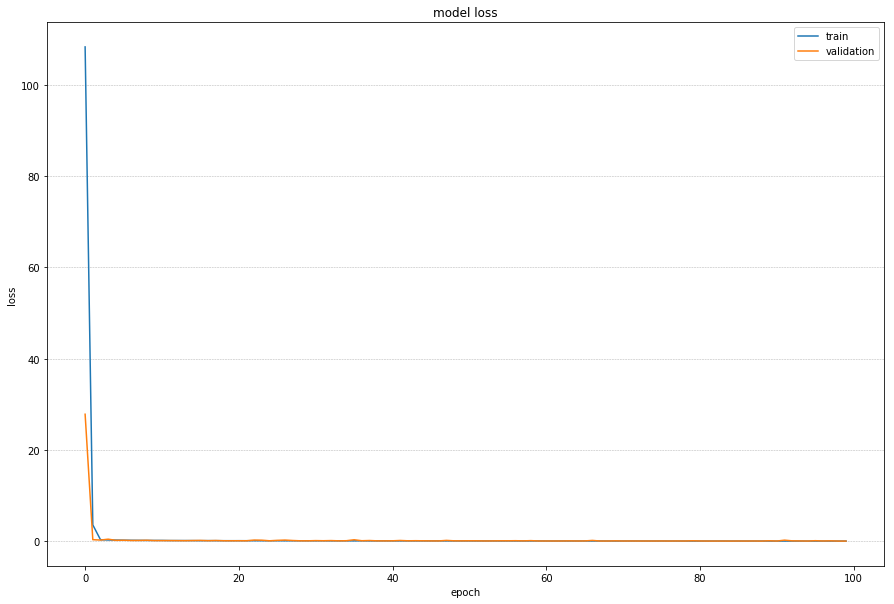
    <br> <br>
    <center><b>Figure- Loss on training set and validation set With optimal Dropout and L2 Regularization.</b></center>
    <br> <br>
    </div>
    
    <div style="text-align: justify; font-size:14px"> Above Figure shows a model in which validation loss gradually decreases, and remains under the training loss curve. In other words, this generalization curve shows that the model is not overfitting to the data in the training set. So L2 regularization improved the model compared to the dropout. The best value for beta was found using trial and error method ranging from 0.01 to 0.1 and the optimal value found was 0.013 <br><br> </div>
    
### Observation:
    * Comparing the above curves, It can be said that adding dropout and regularization improved the generalization of the model.
    
***
    
* #### Activation Function:

    <div style="text-align: justify; font-size:14px"> In the model, Rectified Linear Unit (ReLU) was used in every layer. ReLU adds sparsity and a reduced likelihood of vanishing gradient. But still the problem of vanishing gradient rermains. In the model above, ReLU performed better. Leaky ReLU was also experimented but it didn't generalize as much as ReLU did. ReLU has been also used in the output layer. Putting a non linear activation on the output causes the model to get stuck in a local minima.</div>
    
* #### Optimizers:

    <div style="text-align: justify; font-size:14px"> Root Mean Square Prop (RMSProp) works by keeping an exponentially weighted average of the squares of past gradients. RMSProp then divides the learning rate by this average to speed up convergence. Throughout my observation in different public kernels, Adam has been used. But changing it to RMSProp from Adam, the model generalized very well even though Adam combines the idea of RMSProp and Momentum. The learning rate found was 0.001 keeping other parameters default. </div>
    
* #### Epochs:

    <div style="text-align: justify; font-size:14px"> Different number of epochs were used to train the model. Throughout the training and validation period, the loss curves were monitored. 2500 to 3000 epochs are good for the model. But after that the losses remain unchanged with validation loss higher than the training loss. </div>
    
* #### Batch Size:

    <div style="text-align: justify; font-size:14px">The stochastic gradient descent method and its variants are algorithms of choice for many Deep Learning tasks. These methods operate in a small-batch regime wherein a fraction of the training data, usually 32--512 data points, is sampled to compute an approximation to the gradient. It has been observed in practice that when using a larger batch there is a significant degradation in the quality of the model, as measured by its ability to generalize. [Ref: https://arxiv.org/abs/1609.04836]. In this model, values from 12 to 128 were used. In case of 12 batch size, the model generalized well compared to other larger batch sizes. </div>

***

### Hyperparameters for Best Score
* Number of Layers: <font color=red>4</font>
* Batch Size: <font color=red>12</font>
* Dropout Rate: <font color=red>0.2</font>
* L2 Regularization Beta: <font color=red>0.013</font>
* Activation Function: <font color=red>ReLU</font>
* Optimizer: <font color=red>RMSPropOptimizer (Learning rate = 0.001)</font>
* Epochs: <font color=red>3000</font>
***

#### These Parameters were found after several runs with parameter tuning.

***

### Kaggle Result Submission

In [ ]:
submission = pd.DataFrame()
submission['Id'] = test_id

submission['SalePrice'] = np.expm1(predicted)

submission.to_csv('DNN_Optimal.csv', index=False)

<br>

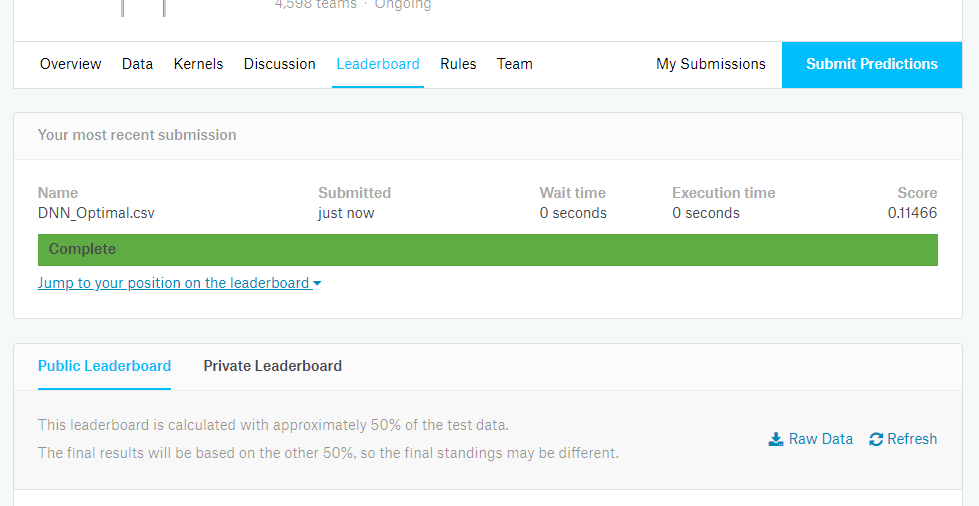

<br>

<center>Fig: Kaggle Submission</center>

***

***


<br></br>
<br></br>
<a id="content6"></a>
 ##  6. Ensemble Approach
<br> </br>


#### Improting Modules

In [24]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import datetime
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
import time
from sklearn import preprocessing
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Ridge, LassoCV,LassoLarsCV, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [55]:
TRAIN_DATA_PATH = 'dataset\\preprocessed_train.v3.csv'
TEST_DATA_PATH = 'dataset\\preprocessed_test.v3.csv'

In [3]:
def create_submission(prediction,score):
    now = datetime.datetime.now()
    sub_file = 'submission_'+str(score)+'_'+'.csv'
    print ('Creating submission: ', sub_file)
    pd.DataFrame({'Id': test['Id'].values, 'SalePrice': prediction}).to_csv(sub_file, index=False)

In [4]:
def mean_squared_error_(ground_truth, predictions):
    return mean_squared_error(ground_truth, predictions) ** 0.5
RMSE = make_scorer(mean_squared_error_, greater_is_better=False)

### Stacked Ensemble with Grid Search

* RandomForestRegressor
* ExtraTreesRegressor
* GradientBoostingRegressor
* XGBRegressor

In [65]:
class ensemble(object):
    def __init__(self, n_folds, stacker, base_models):
        self.n_folds = n_folds
        self.stacker = stacker
        self.base_models = base_models
    def fit_predict(self,train,test,ytr):
        X = train.values
        y = ytr.values
        T = test.values
        folds = list(KFold(len(y), n_folds = self.n_folds, shuffle = True, random_state = 0))
        S_train = np.zeros((X.shape[0],len(self.base_models)))
        S_test = np.zeros((T.shape[0],len(self.base_models))) # X need to be T when do test prediction
        for i,reg in enumerate(base_models):
            print ("Fitting the base model...")
            S_test_i = np.zeros((T.shape[0],len(folds))) # X need to be T when do test prediction
            for j, (train_idx,test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                reg.fit(X_train,y_train)
                y_pred = reg.predict(X_holdout)[:]
                S_train[test_idx,i] = y_pred
                S_test_i[:,j] = reg.predict(T)[:]
            #    S_test_i[:,j] = reg.predict(X)[:]
            S_test[:,i] = S_test_i.mean(1)
        
        print ("Stacking base models...")
        param_grid = {
            'alpha': [1e-3,5e-3,1e-2,5e-2,1e-1,0.2,0.3,0.4,0.5,0.8,1e0,3,5,7,1e1,2e1,5e1],
            }
        grid = GridSearchCV(estimator=self.stacker, param_grid=param_grid, n_jobs=1, cv=5, scoring=RMSE)
        grid.fit(S_train, y)
        try:
            print('Param grid:')
            print(param_grid)
            print('Best Params:')
            print(grid.best_params_)
            print('Best CV Score:')
            print(-grid.best_score_)
            print('Best estimator:')
            print(grid.best_estimator_)
            print(message)
        except:
            pass

        y_pred = grid.predict(S_test)[:]
        return y_pred, -grid.best_score_


#### Creating Base Classifiers

In [66]:
base_models = [
        RandomForestRegressor(
            n_jobs=1, random_state=0,
            n_estimators=500, max_features=18, max_depth=11
        ),
        ExtraTreesRegressor(
            n_jobs=1, random_state=0, 
            n_estimators=500, max_features=20
        ),
        GradientBoostingRegressor(
            random_state=0, 
            n_estimators=500, max_features=10, max_depth=6,
            learning_rate=0.05, subsample=0.8
        ),
        XGBRegressor(
            seed=0,
            n_estimators=500, max_depth=7,
            learning_rate=0.05, subsample=0.8, colsample_bytree=0.75
        ),
    ]


#### Creating an Object

In [67]:
ensemebler = ensemble(
        n_folds=5,
        stacker=Ridge(),
        base_models=base_models
    )

#### Reading Dataset

In [82]:
dataset = pd.read_csv(TRAIN_DATA_PATH)
label = dataset['SalePrice']
dataset.drop(['Id', 'SalePrice'], axis = 1, inplace= True)

dataset= pd.get_dummies(dataset)

In [86]:
test_dataset = pd.read_csv(TEST_DATA_PATH)

test = test_dataset.copy()

test_id = test_dataset['Id']
test_dataset.drop('Id' , axis = 1, inplace=True)

test_dataset= pd.get_dummies(test_dataset)

In [87]:
print(dataset.shape)
print(label.shape)
print(test_dataset.shape)


set(dataset.columns) - set(test_dataset.columns)

(1460, 74)
(1460,)
(1459, 74)


set()

In [88]:
y_pred, score = ensemebler.fit_predict(dataset,test_dataset,label)

Fitting the base model...
Fitting the base model...
Fitting the base model...
Fitting the base model...
Stacking base models...
Param grid:
{'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1.0, 3, 5, 7, 10.0, 20.0, 50.0]}
Best Params:
{'alpha': 0.3}
Best CV Score:
0.12444605484092325
Best estimator:
Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


#### Submission

In [89]:
create_submission(np.expm1(y_pred),score)

Creating submission:  submission_0.12444605484092325_.csv


#### Score Achieved in kaggle:  <font color=red>0.11533</font>

<br>
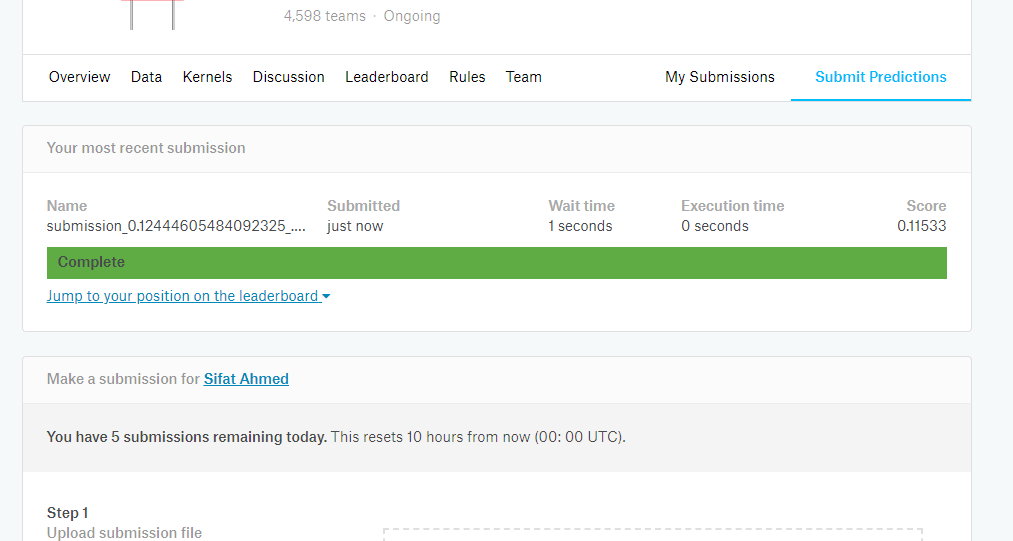

<br>

<center>Fig: Kaggle Submission</center>

<br></br>
<br></br>
<a id="content7"></a>
 ##  7. Conclusion
<br> </br>


The best score achieved here was by Optimized DNN. DNN performed slightly better than the ensemble approach and very better than XGBoost. As I have tried to implement the deep neural network from scratch in a object oriented style, the models complexity arised. This can be improved further, making the model more robust. Adding dynamic regularizers will also improve the score of the model.

<br></br>
<br></br>
<a id="content8"></a>
 ##  8. Acknowledgements
<br> </br>


1. https://www.kaggle.com/c/house-prices-advanced-regression-techniques#tutorials <br>
2. https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python <br>
3. https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard <br>
4. https://www.khanacademy.org/math/statistics-probability <br>
5. http://onlinestatbook.com/mobile/transformations/box-cox.html <br>
6. https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa <br>


<br></br>
<br></br>

 ##  <center> The End </center>
<br> </br>
